In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Постановка проблемы

Предположим, к нам попали данные исследований нескольких (пусть n=3) вакцин;  
В каждом исследовании собирались данные о респондентах, с которых через 1 / 10 / 100 часов собирали оценку самочувствия  

In [16]:
respondents = 1000

def make_research():
  research = {
      "gender": np.random.randint(0,2,respondents),            # 0 - m, 1 - f
      "age": np.random.normal(25.0,20.0,respondents),
      "height": np.random.normal(170.0,15.5,respondents),
      "weight": np.random.normal(65.0,25.0,respondents)
      }

  feeled_bad = 0                                                # считаем, сколько всего людей ощутили себя плохо

  part = np.random.randint(7,20,1)                              # доля респондентов, которые будут подвержены плохому самочувствию
  feeled_bad += part

  research["condition_after_1"] = np.random.normal(
      (5 *                                                      # мат. ожидание сдвигается: если бы исследования и не было, в среднем все ставили бы ровно 5,
       (respondents * (1 - part/100)) +                         # но теперь 5 в среднем поставят меньшее число людей
       1 * (respondents * part/100))                            # остальные захотят поставить 1
      / respondents,

      2.0,
      respondents
      )

  got_better = 1 if np.random.randint(0,10,1) > 7 else -1       # будем считать, что люди более склонны иметь ухудшившееся самочувствие через какое-то время
  part = np.random.randint(
      7 - (got_better * 2),
      20 - (got_better * 5),
      1)
  feeled_bad += part

  research["condition_after_10"] = np.random.normal(
      (5 *
       (respondents * (1 - part/100)) +
       1 * (respondents * part/100))
      / respondents,

      1.0,
      respondents
      )

  got_better = 1 if np.random.randint(0,10,1) > 3 else -1       # будем считать, что люди более склонны иметь улучшившееся самочувствие через продолжительное время
  part = np.random.randint(
      7 - (got_better * 3),
      20 - (got_better * 7),
      1)
  feeled_bad += part

  research["condition_after_100"] = np.random.normal(
      (5 *
       (respondents * (1 - part/100)) +
       1 * (respondents * part/100))
      / respondents,

      2.5,
      respondents
      )

  return research

In [17]:
researh_0 = make_research()

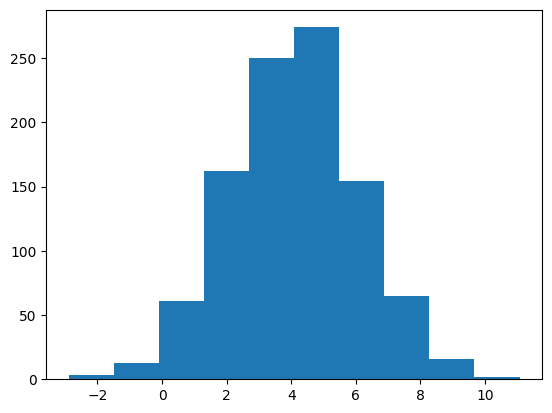

In [18]:
_ =plt.hist(researh_0["condition_after_1"])

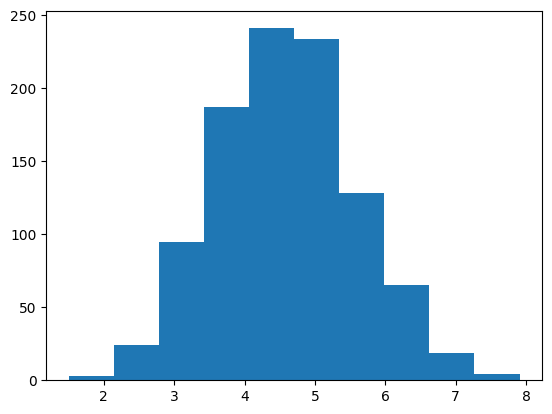

In [19]:
_ =plt.hist(researh_0["condition_after_10"])

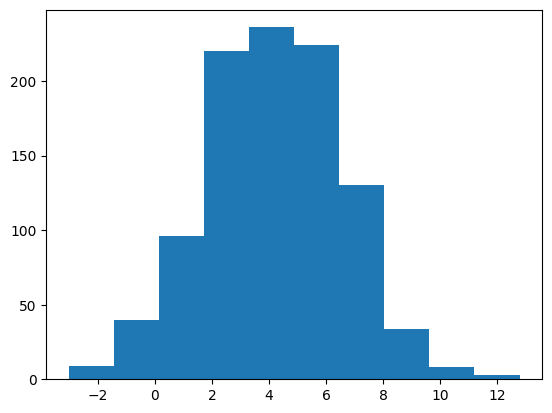

In [20]:
_ =plt.hist(researh_0["condition_after_100"])

# Задание

Мы хотим:
- проверить, что с данными все в порядке (т.к. данные генерили с помощью распределений, у нас могут быть отрицательные числа, которые надо исправить на 0, а также числа больше 10, которые надо исправить на 10) - построить гистограммы и почистить данные
- сравнить между собой результаты исследований разных вакцин и каким-либо образом представить сравнение исследований (т.е., к примеру, показать в одном пространстве сразу 3 исследования, пользуясь признаками "средняя оценка самочувствия после 1 часа", "средняя оценка самочувствия после 10 часов", "средняя оценка самочувствия после 100 часов"
- важно! обратите внимание на цвета, что вы используете

In [27]:
research = make_research()

In [30]:
def clean_data(research):
    import copy

    def to_zero(a): return max(0, a)
    def to_ten(b): return min(10, b)

    vto_zero = np.vectorize(to_zero)
    vto_ten = np.vectorize(to_ten)

    _research = copy.deepcopy(research)
    _research["condition_after_1"]   = vto_zero(vto_ten(_research["condition_after_1"]))
    _research["condition_after_10"]  = vto_zero(vto_ten(_research["condition_after_10"]))
    _research["condition_after_100"] = vto_zero(vto_ten(_research["condition_after_100"]))

    return _research


In [32]:
chistie_danie = clean_data(research)

(array([ 59.,  63.,  98., 164., 156., 149., 135.,  75.,  42.,  59.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

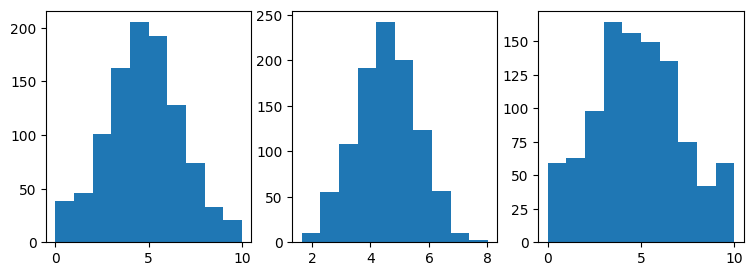

In [56]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))
axes[0].hist(chistie_danie["condition_after_1"])
axes[1].hist(chistie_danie["condition_after_10"])
axes[2].hist(chistie_danie["condition_after_100"])

Text(0.5, 1.0, 'Condtion after 100')

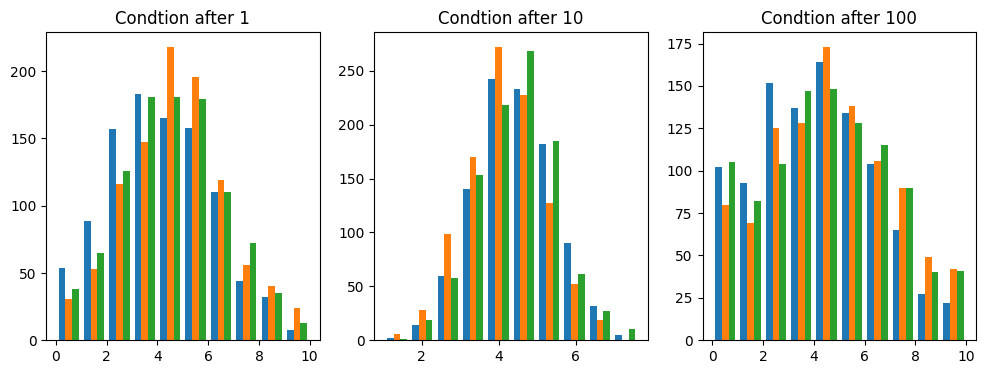

In [77]:
research_1 = clean_data(make_research())
research_2 = clean_data(make_research())
research_3 = clean_data(make_research())

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

after_1   = [research_1["condition_after_1"],    research_2["condition_after_1"],   research_3["condition_after_1"]]
after_10  = [research_1["condition_after_10"],   research_2["condition_after_10"],  research_3["condition_after_10"]]
after_100 = [research_1["condition_after_100"],  research_2["condition_after_100"], research_3["condition_after_100"]]

axes[0].hist(after_1, 10)
axes[1].hist(after_10, 10)
axes[2].hist(after_100, 10)

axes[0].set_title("Condtion after 1")
axes[1].set_title("Condtion after 10")
axes[2].set_title("Condtion after 100")
